# Wrangling Code

In [1]:
options(repr.matrix.max.rows = 6)
library(tidyverse)
library(tidymodels)
library(RColorBrewer)
library(rvest)
library(repr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [3]:
url <- read_csv("https://raw.githubusercontent.com/BurakMOzkan/DSCI100_group_3/main/heart.csv?token=GHSAT0AAAAAACJLQJGM7SQP37V2PZPFAPVOZJ5YVQQ")
url

Rows: 1025 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [4]:
heart_disease <- url |>
                 select(age, cp, trestbps, chol, thalach) |>
                 rename(chest_pain_type = cp,
                        resting_bp = trestbps,
                        serum_cholesterol = chol,
                        max_heart_rate = thalach)
heart_disease   

age,chest_pain_type,resting_bp,serum_cholesterol,max_heart_rate
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
52,0,125,212,168
53,0,140,203,155
70,0,145,174,125
⋮,⋮,⋮,⋮,⋮
47,0,110,275,118
50,0,110,254,159
54,0,120,188,113


In [5]:
# Splitting data into the training and testing data sets:

hd_split <- initial_split(heart_disease, prop = 0.80, strata = chest_pain_type)
hd_train <- training(hd_split)
hd_test <- testing(hd_split) 
glimpse(hd_train)

Rows: 819
Columns: 5
$ age               <dbl> 52, 53, 70, 61, 62, 58, 55, 46, 54, 43, 51, 52, 54, …
$ chest_pain_type   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ resting_bp        <dbl> 125, 140, 145, 148, 138, 114, 160, 120, 122, 132, 14…
$ serum_cholesterol <dbl> 212, 203, 174, 203, 294, 318, 289, 249, 286, 341, 29…
$ max_heart_rate    <dbl> 168, 155, 125, 161, 106, 140, 145, 144, 116, 136, 12…


In [6]:
# TABLE 1: the number of observations per type and their abundance of the response variable

chest_pain_prop <- hd_train |>
                   group_by(chest_pain_type) |>
                   summarize(n = n()) |>
                   mutate(percent = 100*n/nrow(hd_train))

chest_pain_prop

# TABLE 2: the average for all predictors

average_predictor <- hd_train |>
                     select(age, resting_bp, serum_cholesterol, max_heart_rate) |>
                     map_dfr(mean)
average_predictor

chest_pain_type,n,percent
<dbl>,<int>,<dbl>
0,399,48.717949
1,130,15.873016
2,227,27.716728
3,63,7.692308


age,resting_bp,serum_cholesterol,max_heart_rate
<dbl>,<dbl>,<dbl>,<dbl>
54.32967,131.431,245.1233,149.1465


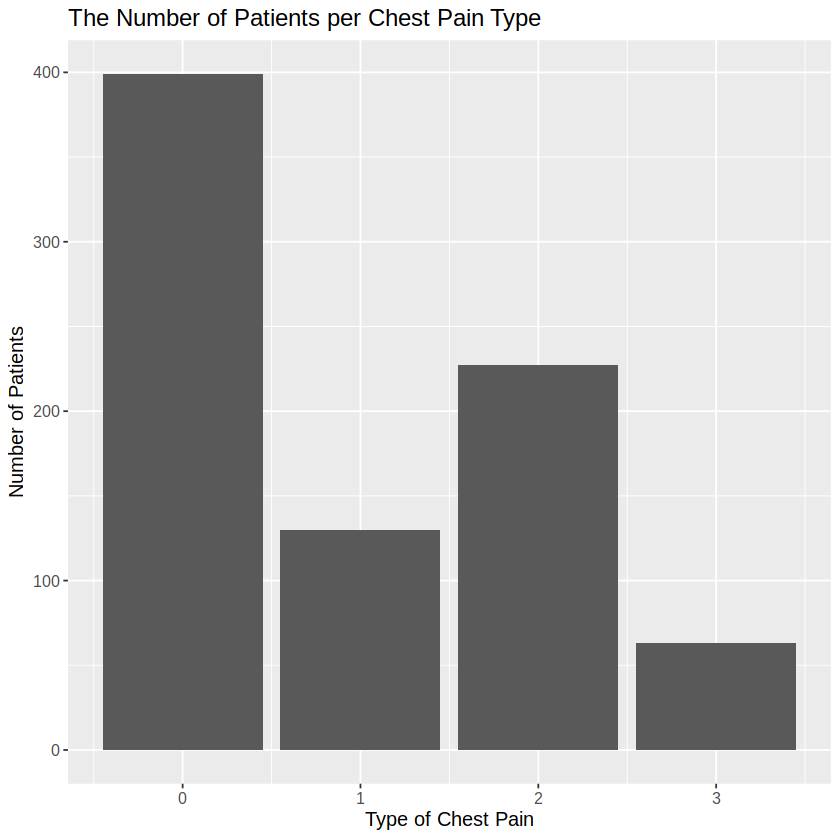

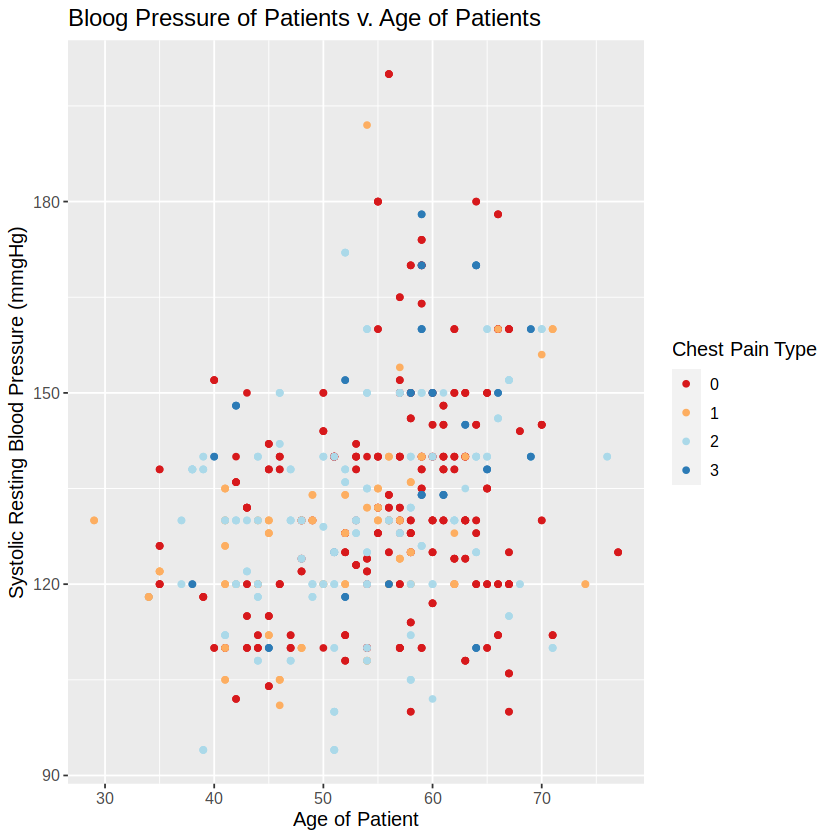

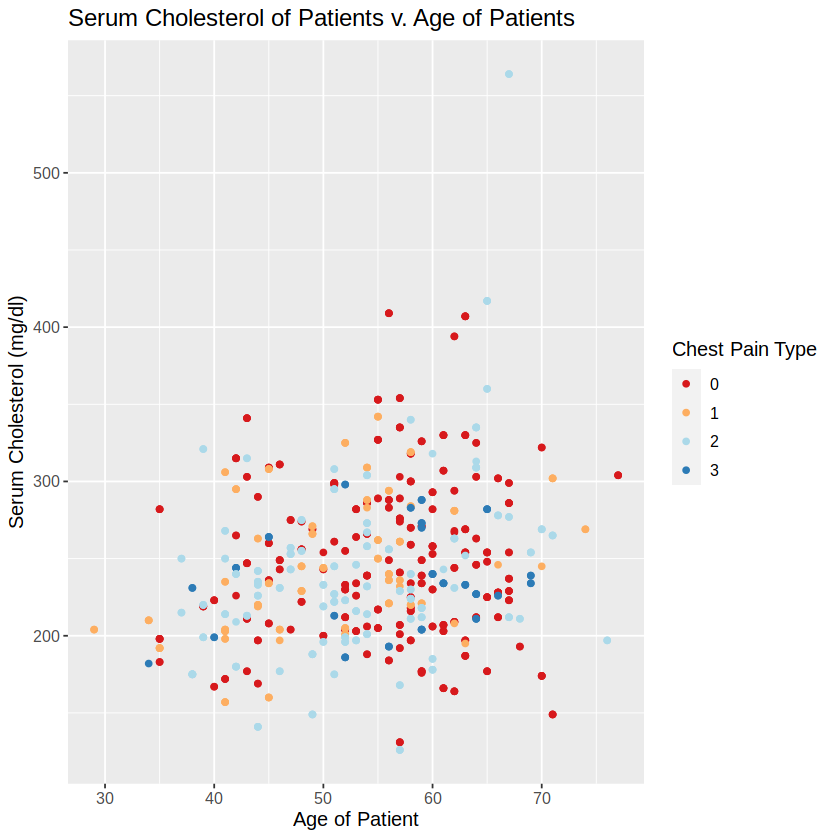

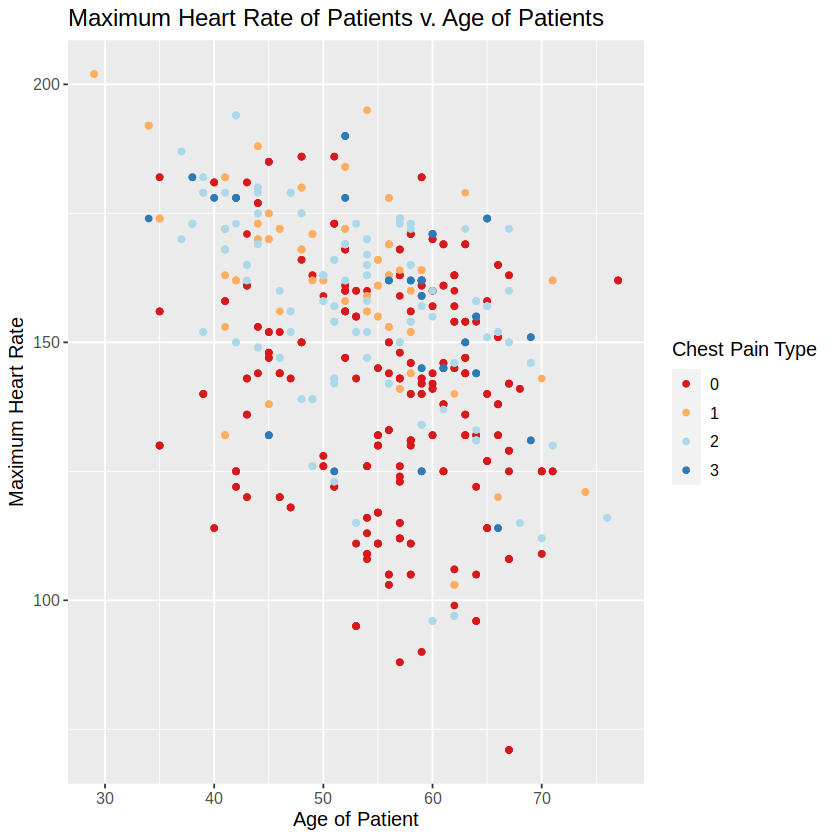

In [7]:
# Bar graph for the chest pain type:

chest_pain_bar <- hd_train |>
                  ggplot(aes(x = chest_pain_type)) +
                  geom_bar() +
                  labs(x = "Type of Chest Pain", y = "Number of Patients",  fill = "Chest Pain Type") +
                  ggtitle("The Number of Patients per Chest Pain Type") +
                  theme(text = element_text(size = 12)) 
chest_pain_bar

# Visualizing each predictor against age and grouping with regards to the chest pain type:

resting_bp_plot <- hd_train |>
                   ggplot(aes(x = age, y = resting_bp, color = as_factor(chest_pain_type))) +
                   geom_point() +
                   labs(x = "Age of Patient", y = "Systolic Resting Blood Pressure (mmgHg)",  color = "Chest Pain Type") +
                   ggtitle("Bloog Pressure of Patients v. Age of Patients") +
                   theme(text = element_text(size = 12), legend.position = "right", legend.direction = "vertical") +
                   scale_color_brewer(palette = "RdYlBu")

chol_plot <- hd_train |>
                   ggplot(aes(x = age, y = serum_cholesterol, color = as_factor(chest_pain_type))) +
                   geom_point() +
                   labs(x = "Age of Patient", y = "Serum Cholesterol (mg/dl)",  color = "Chest Pain Type") +
                   ggtitle("Serum Cholesterol of Patients v. Age of Patients") +
                   theme(text = element_text(size = 12), legend.position = "right", legend.direction = "vertical") +
                   scale_color_brewer(palette = "RdYlBu")

max_hr_plot <- hd_train |>
                   ggplot(aes(x = age, y = max_heart_rate, color = as_factor(chest_pain_type))) +
                   geom_point() +
                   labs(x = "Age of Patient", y = "Maximum Heart Rate",  color = "Chest Pain Type") +
                   ggtitle("Maximum Heart Rate of Patients v. Age of Patients") +
                   theme(text = element_text(size = 12), legend.position = "right", legend.direction = "vertical") +
                   scale_color_brewer(palette = "RdYlBu")

resting_bp_plot
chol_plot
max_hr_plot

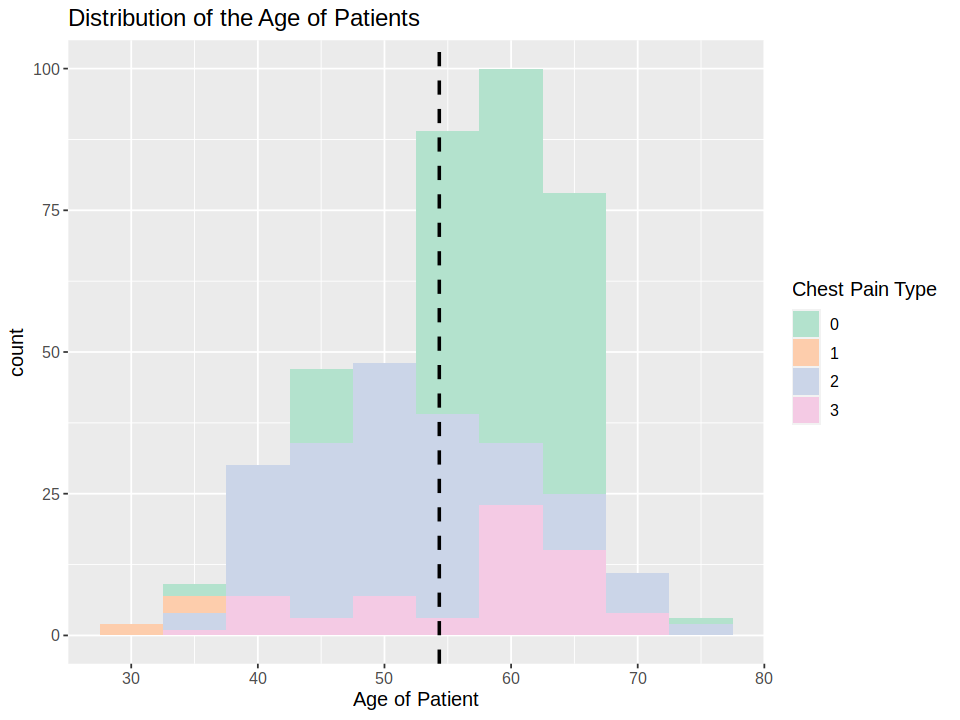

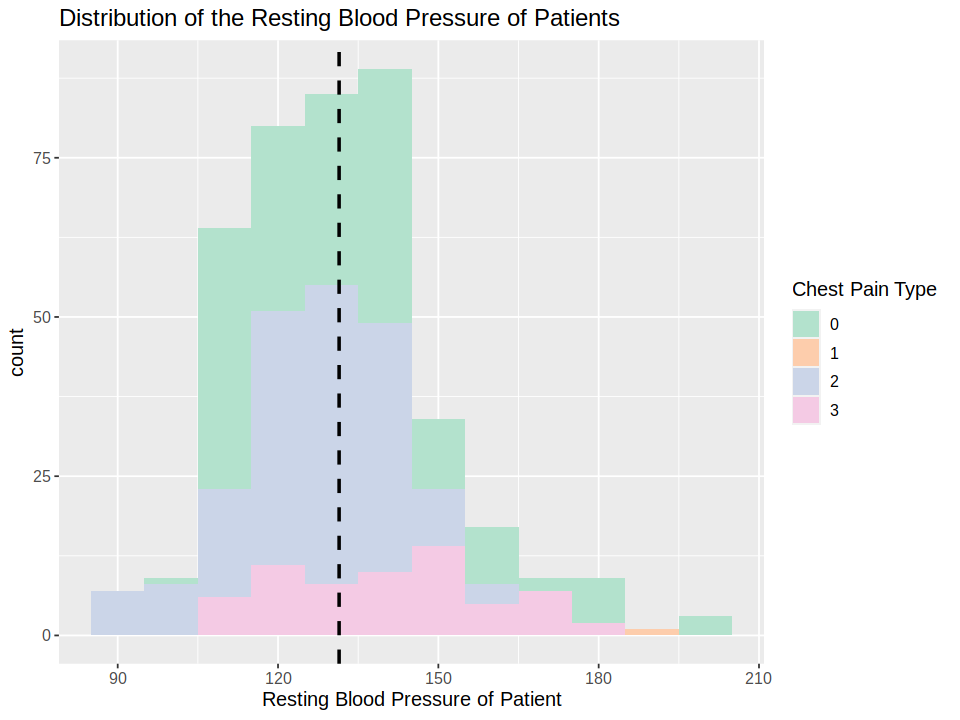

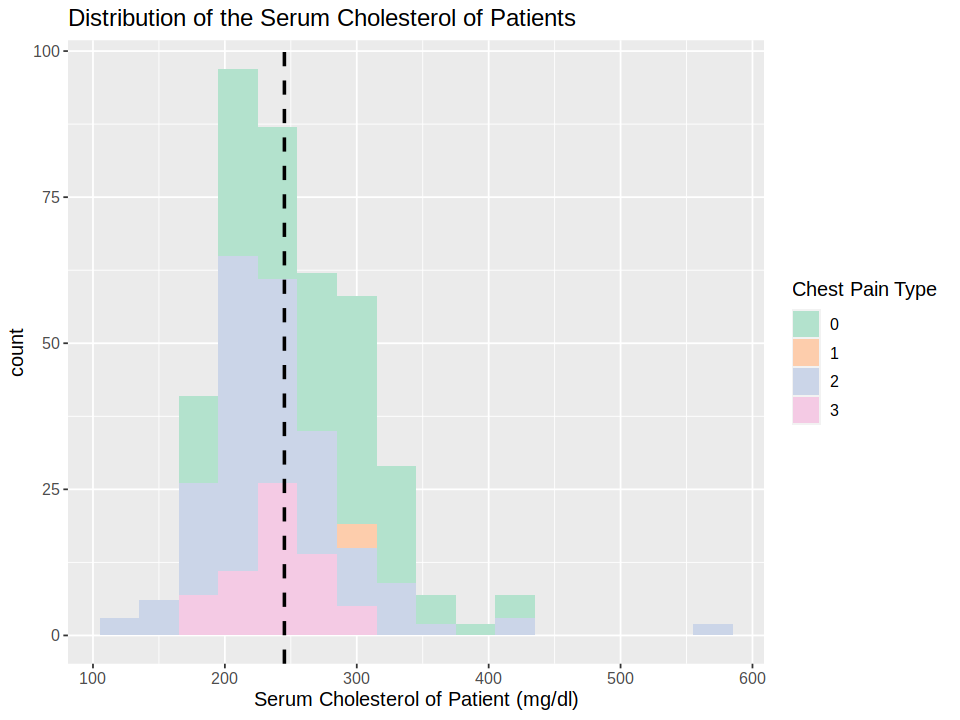

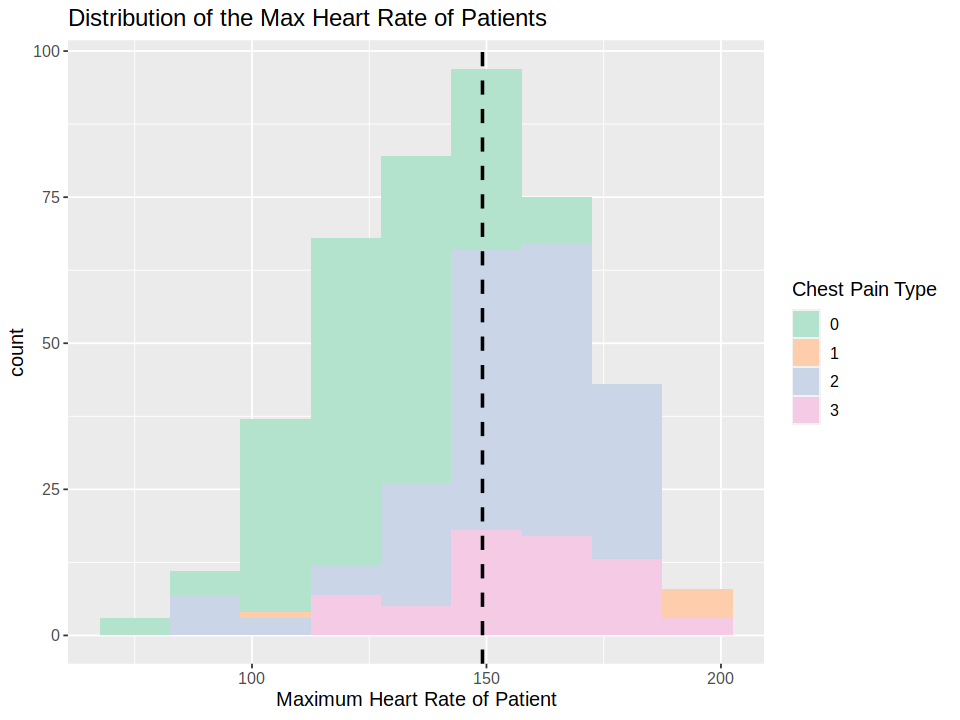

In [8]:
# distribution of each predictor variable in relation to the chest pain type
options(repr.plot.width = 8, repr.plot.height = 6)

# Age
age_histogram <- hd_train |>
    ggplot(aes(x = age, fill = as_factor(chest_pain_type))) +
    geom_histogram(position = "identity", binwidth = 5) +
    geom_vline(xintercept = as.numeric(average_predictor[1,1]), 
               linetype = "dashed", linewidth = 1) +
    labs(x = "Age of Patient", fill = "Chest Pain Type") +
    ggtitle("Distribution of the Age of Patients") +
    theme(text = element_text(size = 12), legend.position = "right", legend.direction = "vertical") +
    scale_fill_brewer(palette = "Pastel2")

# Resting Blood Pressure
bp_histogram <- hd_train |>
    ggplot(aes(x = resting_bp, fill = as_factor(chest_pain_type))) +
    geom_histogram(position = "identity", binwidth = 10) +
    geom_vline(xintercept = as.numeric(average_predictor[1,2]), 
               linetype = "dashed", linewidth = 1) +
    labs(x = "Resting Blood Pressure of Patient", fill = "Chest Pain Type") +
    ggtitle("Distribution of the Resting Blood Pressure of Patients") +
    theme(text = element_text(size = 12), legend.position = "right", legend.direction = "vertical") +
    scale_fill_brewer(palette = "Pastel2")

# Serum Cholesterol
chol_histogram <- hd_train |>
    ggplot(aes(x = serum_cholesterol, fill = as_factor(chest_pain_type))) +
    geom_histogram(position = "identity", binwidth = 30) +
    geom_vline(xintercept = as.numeric(average_predictor[1,3]), 
               linetype = "dashed", linewidth = 1) +
    labs(x = "Serum Cholesterol of Patient (mg/dl)", fill = "Chest Pain Type") +
    ggtitle("Distribution of the Serum Cholesterol of Patients") +
    theme(text = element_text(size = 12), legend.position = "right", legend.direction = "vertical") +
    scale_fill_brewer(palette = "Pastel2")

# Max Heart Rate
hr_histogram <- hd_train |>
    ggplot(aes(x = max_heart_rate, fill = as_factor(chest_pain_type))) +
    geom_histogram(position = "identity", binwidth = 15) +
    geom_vline(xintercept = as.numeric(average_predictor[1,4]), 
               linetype = "dashed", linewidth = 1) +
    labs(x = "Maximum Heart Rate of Patient", fill = "Chest Pain Type") +
    ggtitle("Distribution of the Max Heart Rate of Patients") +
    theme(text = element_text(size = 12), legend.position = "right", legend.direction = "vertical") +
    scale_fill_brewer(palette = "Pastel2")

age_histogram
bp_histogram
chol_histogram
hr_histogram